# Actividad "Redes Neuronales y Deep Learning"

## Introducción
El presente notebook sirve como actividad del tema. Cada una de las secciones se corresponde con un ejercicio a resolver.

## Entrega
El entregable deberá ser una memoria en formato PDF donde se adjunten los resultados obtenidos (gráficas, métricas, etc.), comentarios justificando los pasos realizados y conclusiones sobre los resultados.

Se puede incluir también partes del código o cualquier referencia si se considera necesario.

Si bien no se estrablece un límite en el número de páginas, una extensión razonable podría ser 3-5 páginas.

## Evaluación
Se valorará que:
- Todos los ejercicios estén resueltos y respondidos.
- Se incluyan comentarios en los distintos ejercicios.
- Se incluyan conclusiones razonadas sobre los resultados.
- El formato de la memoria sea limpio y ordenado.

## Ejercicio 1



### 1.A) 

De manera similar a lo realizado durante la asignatura, se debe crear un modelo consistente en una red neuronal sencilla compuesta por:

- entrada de datos de dimensión (2,).
- una unica capa oculta densa con 2 neuronas que implemente la función de activación "linear".
- una capa densa a la salida con una única neurona que implemente la función de activación "linear".

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [38]:
model = keras.Sequential(
    [
     keras.Input(shape=(2,)),
     layers.Dense(2, activation='linear', name='oculta'),
     layers.Dense(1, name='salida')
    ]
)

### 1.B)

Responda a las siguientes preguntas sobre el modelo:

- ¿Se podría utilizar para problemas de clasificación o de regresión?
- ¿Por qué?

Para problemas de **regresión**, donde se busca predecir un valor numérico continuo, una única neurona con función lineal puede ser adecuada. La función lineal permite una salida continua y puede ajustarse a diferentes rangos de valores.

Por otro lado, para problemas de **clasificación**, donde se busca asignar una muestra a una o varias clases predefinidas, se requiere utilizar una función de activación adecuada, como la función sigmoidal en el caso de la clasificación binaria. La función sigmoidal garantiza que la salida del modelo esté en el rango [0, 1], lo que se interpreta como probabilidades o niveles de pertenencia a cada clase.

### 1.C)

- Imprima la estructura del modelo.
- ¿A qué hace referencia el número de parámetros?

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta (Dense)              (None, 2)                 6         
                                                                 
 salida (Dense)              (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


El número de parámetros en el resumen del modelo se refiere a la cantidad de pesos y sesgos que se aprenden durante el entrenamiento de la red neuronal. Estos parámetros son los valores ajustables que permiten al modelo aprender y realizar las predicciones.

Para hallarlos hay que multiplicar el número de datos de entrada a las neuronas por sus pesos y sumarle el sesgo de cada neurona de esa capa, por esa razón hay en la primera capa 6 y en la segunda 3.

## Ejercicio 2

El ejercicio 2 está relacionado con los dos siguientes, por lo que se recomienda leerlos antes de comenzar su resolución.

El alumno debera escoger un dataset (elección completamente libre) para un problema de regresión o clasificación (no importa si binaria o multiclase, pero evitad multilabel). Posteriormente (ejercicios 3 y 4), se entrenarán modelos de redes neuronales para enfrentar el problema que se propone en dicho dataset.

Aquí podéis encontrar algunos datasets, pero de nuevo, la elección es completamente libre:

https://archive.ics.uci.edu/ml/datasets.php

In [40]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split

### 2.A)

Elección del dataset y explicación del problema.

In [41]:
filename = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(filename, sep=',')

// Este conjunto de datos incluye datos para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, en función de sus hábitos alimenticios y condición física.

Los datos se pueden utilizar para la estimación del nivel de obesidad de las personas, problema que dividiremos en dos partes. La primera usa dos categorias para estimar mediante un una clasificación binaria y la segunda usa siete categorías para estimar con una clasificación multiclase el nivel de obesidad, lo que permite un análisis detallado del nivel de afectación de un individuo.

Información del atributo: 
Lea el artículo para ver la descripción de los atributos.
 [enlace web: (https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub)]

In [42]:
df.head(-10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,Female,25.955014,1.626449,104.879602,yes,yes,3.0,3.0,Sometimes,no,2.094901,no,0.070890,0.599441,Sometimes,Public_Transportation,Obesity_Type_III
2097,Female,25.996716,1.626580,105.037203,yes,yes,3.0,3.0,Sometimes,no,2.347322,no,0.008013,0.503896,Sometimes,Public_Transportation,Obesity_Type_III
2098,Female,25.992348,1.606474,104.954291,yes,yes,3.0,3.0,Sometimes,no,2.331123,no,0.063383,0.561661,Sometimes,Public_Transportation,Obesity_Type_III
2099,Female,25.974446,1.628855,108.090006,yes,yes,3.0,3.0,Sometimes,no,1.757105,no,0.085119,0.465444,Sometimes,Public_Transportation,Obesity_Type_III


### 2.B)

Preprocesar el dataset: eliminar nulos (si los hubiese), obtener variables dummy (si es necesario), normalizar (si se desea), etc.

In [43]:
df.isnull().sum()
# no existen nulos en el df.

#Redondeo de valores
df['Age'] = round(df['Age'], 0)
df['Height'] = round(df['Height'], 2)
df['Weight'] = round(df['Weight'], 2)
df['FCVC'] = round(df['FCVC'], 0)
df['NCP'] = round(df['NCP'], 0)
df['CH2O'] = round(df['CH2O'], 0)
df['FAF'] = round(df['FAF'], 0)
df['TUE'] = round(df['TUE'], 0)

# Para las variables a estandarizar tomamos el primer digito a la izquierda.
df['FCVC'] = df['FCVC'].astype(str).str.slice(stop=1)
df['NCP'] = df['NCP'].astype(str).str.slice(stop=1)
df['CH2O'] = df['CH2O'].astype(str).str.slice(stop=1)
df['FAF'] = df['FAF'].astype(str).str.slice(stop=1)
df['TUE'] = df['TUE'].astype(str).str.slice(stop=1)


# Estandarizar variables
df["FCVC"].replace(to_replace='1',  value='Never', inplace=True)
df["FCVC"].replace(to_replace='2',  value='Sometimes', inplace=True)
df["FCVC"].replace(to_replace='3',  value='Always', inplace=True)
df["NCP"].replace(to_replace='1',  value='Between 1 and 2', inplace=True)
df["NCP"].replace(to_replace='3',  value='Three', inplace=True)
df["NCP"].replace(to_replace='4',  value='More than three', inplace=True)
df["CH2O"].replace(to_replace='1',  value='Less than a liter', inplace=True)
df["CH2O"].replace(to_replace='2',  value='Between 1 and 2 L', inplace=True)
df["CH2O"].replace(to_replace='3',  value='More than 2 L', inplace=True)
df["FAF"].replace(to_replace='0',  value='I do not have', inplace=True)
df["FAF"].replace(to_replace='1',  value='1 or 2 days', inplace=True)
df["FAF"].replace(to_replace='2',  value='2 or 4 days', inplace=True)
df["FAF"].replace(to_replace='3',  value='4 or 5 days', inplace=True)
df["TUE"].replace(to_replace='0',  value='0–2 hours', inplace=True)
df["TUE"].replace(to_replace='1',  value='3–5 hours', inplace=True)
df["TUE"].replace(to_replace='2',  value='More than 5 hours', inplace=True)
df["TUE"].replace(to_replace='2',  value='More than 5 hours', inplace=True)

# Convertir la variable "NObeyesdad" en una variable binaria, donde 0 significa "no obeso" y 1 significa "obeso". 
# Esto es útil para análisis estadísticos que requieren variables numéricas en lugar de categorías.
# También simplifica el análisis y la interpretación de los resultados a tener unicamente una clasificacion binaria.

df["NObeyesdad"].replace(to_replace='Normal_Weight',  value='0', inplace=True)
df["NObeyesdad"].replace(to_replace='Overweight_Level_I',  value='1', inplace=True)
df["NObeyesdad"].replace(to_replace='Overweight_Level_II',  value='1', inplace=True)
df["NObeyesdad"].replace(to_replace='Obesity_Type_I',  value='1', inplace=True)
df["NObeyesdad"].replace(to_replace='Insufficient_Weight',  value='0', inplace=True)
df["NObeyesdad"].replace(to_replace='Obesity_Type_II',  value='1', inplace=True)
df["NObeyesdad"].replace(to_replace='Obesity_Type_III',  value='1', inplace=True)



# Ver resultados de preparación del dato                  
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,Always,Three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,Always,Three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,1
4,Male,22.0,1.78,89.8,no,no,Sometimes,Between 1 and 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public_Transportation,1
5,Male,29.0,1.62,53.0,no,yes,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Automobile,0
6,Female,23.0,1.50,55.0,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0–2 hours,Sometimes,Motorbike,0
7,Male,22.0,1.64,53.0,no,no,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,4 or 5 days,0–2 hours,Sometimes,Public_Transportation,0
8,Male,24.0,1.78,64.0,yes,yes,Always,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Frequently,Public_Transportation,0
9,Male,22.0,1.72,68.0,yes,yes,Sometimes,Three,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,no,Public_Transportation,0


In [44]:
df_dummies = pd.get_dummies(df, columns=['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad' ])

df_dummies.head()


,Age,Height,Weight,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_2,NCP_Between 1 and 2,NCP_More than three,NCP_Three,...,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_0,NObeyesdad_1
0,21.0,1.62,64.0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,21.0,1.52,56.0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
2,23.0,1.80,77.0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,27.0,1.80,87.0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
4,22.0,1.78,89.8,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [45]:
df_dummies.describe()

,Age,Height,Weight,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_2,NCP_Between 1 and 2,NCP_More than three,NCP_Three,...,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_0,NObeyesdad_1
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,0.471814,0.048318,0.479867,0.083373,0.149692,0.070583,0.696352,...,0.033160,0.663667,0.302700,0.216485,0.003316,0.005211,0.748460,0.026528,0.264803,0.735197
std,6.357078,0.093368,26.191163,0.499323,0.214489,0.499713,0.276510,0.356854,0.256187,0.459941,...,0.179096,0.472566,0.459535,0.411946,0.057502,0.072015,0.434001,0.160737,0.441333,0.441333
min,14.000000,1.450000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,1.700000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,26.000000,1.770000,107.430000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,61.000000,1.980000,173.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.C)

Preparar los conjuntos de:
- train
- validación
- test

In [46]:
# Ratios para división del dataset en los conjuntos necesarios
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

In [47]:
# División de conjuntos estratificada con variable objetivo 
X_train, X_test, y_train, y_test = train_test_split(df_dummies.iloc[:,:30], df_dummies.iloc[:,-1], test_size=1-train_ratio, stratify=df_dummies.iloc[:,-1])
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio+validation_ratio), stratify=y_test)

Comprobamos balanceo de la variable objetivo

In [48]:
counts_train = np.bincount(y_train)
counts_val = np.bincount(y_val)
counts_test = np.bincount(y_test)

In [49]:
print("Número de muestras positivas en el conjunto de datos de entrenamiento: {} ({:.2f}% of total)".format(counts_train[1], 100 * float(counts_train[1]) / len(y_train)))
print("Número de muestras positivas en el conjunto de datos de validación: {} ({:.2f}% of total)".format(counts_val[1], 100 * float(counts_val[1]) / len(y_val)))
print("Número de muestras positivas en el conjunto de datos de test: {} ({:.2f}% of total)".format(counts_test[1], 100 * float(counts_test[1]) / len(y_test)))

Número de muestras positivas en el conjunto de datos de entrenamiento: 1164 (73.53% of total)
Número de muestras positivas en el conjunto de datos de validación: 232 (73.42% of total)
Número de muestras positivas en el conjunto de datos de test: 156 (73.58% of total)


Podemos ver cómo los datos están desbalanceados y como ese desbalanceo se preserva en los distintos conjuntos que hemos generado.

Normalización de datos

In [50]:
mean = np.mean(X_train, axis=0)
X_train -= mean
X_val -= mean
X_test -= mean

std = np.std(X_train, axis=0)
X_train /= std
X_val /= std
X_test /= std

In [51]:
X_train.describe()

,Age,Height,Weight,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_2,NCP_Between 1 and 2,NCP_More than three,NCP_Three,...,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
count,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,...,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03,1.583000e+03
mean,2.244292e-16,-1.750547e-16,-3.837739e-16,1.340964e-16,3.142008e-17,4.488583e-18,-3.927510e-18,-6.284017e-17,8.416094e-17,9.987098e-17,...,7.967235e-17,-7.967235e-17,6.732875e-17,1.705662e-16,2.244292e-17,-1.974977e-16,-1.795433e-17,-2.468721e-17,-6.284017e-17,7.181733e-17
std,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,...,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00,1.000316e+00
min,-1.637452e+00,-2.701962e+00,-1.821916e+00,-9.573217e-01,-2.214477e-01,-9.512801e-01,-2.889714e-01,-4.206562e-01,-2.785746e-01,-1.529596e+00,...,-9.930751e-01,-1.006973e+00,-4.665751e-01,-2.143278e+00,-3.615443e-01,-2.765913e+00,-1.650910e-01,-3.648869e-01,-2.235221e+00,-1.525479e-01
25%,-6.888383e-01,-7.813486e-01,-7.959852e-01,-9.573217e-01,-2.214477e-01,-9.512801e-01,-2.889714e-01,-4.206562e-01,-2.785746e-01,-1.529596e+00,...,-9.930751e-01,-1.006973e+00,-4.665751e-01,4.665751e-01,-3.615443e-01,3.615443e-01,-1.650910e-01,-3.648869e-01,4.473831e-01,-1.525479e-01
50%,-2.145316e-01,-3.444351e-02,-1.500285e-01,-9.573217e-01,-2.214477e-01,-9.512801e-01,-2.889714e-01,-4.206562e-01,-2.785746e-01,6.537676e-01,...,-9.930751e-01,9.930751e-01,-4.665751e-01,4.665751e-01,-3.615443e-01,3.615443e-01,-1.650910e-01,-3.648869e-01,4.473831e-01,-1.525479e-01
75%,2.597750e-01,7.124616e-01,8.067474e-01,1.044581e+00,-2.214477e-01,1.051215e+00,-2.889714e-01,-4.206562e-01,-2.785746e-01,6.537676e-01,...,1.006973e+00,9.930751e-01,-4.665751e-01,4.665751e-01,-3.615443e-01,3.615443e-01,-1.650910e-01,-3.648869e-01,4.473831e-01,-1.525479e-01
max,5.793353e+00,2.953177e+00,2.968042e+00,1.044581e+00,4.515738e+00,1.051215e+00,3.460551e+00,2.377238e+00,3.589703e+00,6.537676e-01,...,1.006973e+00,9.930751e-01,2.143278e+00,4.665751e-01,2.765913e+00,3.615443e-01,6.057266e+00,2.740575e+00,4.473831e-01,6.555320e+00


## Ejercicio 3

### 3.A)

Definir la estructura del modelo. Consideraciones:
- la capa de entrada debe tener una dimensión igual al del número de variables utilizadas durante el entrenamiento.
- la capa de salida debe tener una dimensión y una función de activación acorde al problema.
- la elección del total de capas ocultas (deben ser Dense), el de neuronas por capa, y la función de activación por capa, queda a libertad del alumno.

In [52]:
model_1 = keras.Sequential(
    [
     keras.Input(shape=(X_train.shape[1],)),  # capa de entrada, tendrá tantas neuronas como variables usemos para entrenar
     layers.Dense(128, activation='relu'),  # capa oculta
     layers.Dense(64, activation='relu'),  # capa oculta
     layers.Dense(32, activation='relu'),  # capa oculta
     layers.Dense(1, activation='sigmoid')  # capa de salida
    ]
)

### 3.B)

Compilar el modelo especificando:
- optimizer
- loss
- metrics

In [53]:
metrics = [

    keras.metrics.Precision(name="precision"),  # precision
    keras.metrics.Recall(name="recall"),  # recall
]

In [54]:
#Dejamos Adam como optimizador y Binary Cross Entropy como función de pérdida. Haremos esto siempre que tengamos un problema de clasificación binaria.
model_1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=metrics
)

In [55]:
#Configuramos los parámetros del entrenamiento.
batch_size = 32
epochs = 50
verbose = 1

### 3.C)

Entrenar el modelo utilizando el conjunto de datos de train y de validación durante 50 épocas y un batch_size de 32.

Comentar la evolución del entrenamiento.

Es importante guardar la evolución del entrenamiento en una variable para poder luego pintar gráficas:

```history = model.fit(...)```

In [56]:
history_model_1 = model_1.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_data=(X_val, y_val)
)

Epoch 1/50
50/50 [==============================] - 2s 10ms/step - loss: 0.3430 - precision: 0.8697 - recall: 0.9519 - val_loss: 0.2230 - val_precision: 0.9407 - val_recall: 0.9569
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.1904 - precision: 0.9415 - recall: 0.9536 - val_loss: 0.1700 - val_precision: 0.9454 - val_recall: 0.9698
Epoch 3/50
50/50 [==============================] - 0s 7ms/step - loss: 0.1286 - precision: 0.9624 - recall: 0.9665 - val_loss: 0.1191 - val_precision: 0.9622 - val_recall: 0.9871
Epoch 4/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0874 - precision: 0.9795 - recall: 0.9828 - val_loss: 0.1056 - val_precision: 0.9463 - val_recall: 0.9871
Epoch 5/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0627 - precision: 0.9897 - recall: 0.9880 - val_loss: 0.0939 - val_precision: 0.9662 - val_recall: 0.9871
Epoch 6/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0400 - precision: 0.9898 

In [57]:
hist_model_1 = pd.DataFrame(history_model_1.history)
hist_model_1['epoch'] = history_model_1.epoch
hist_model_1.head()

,loss,precision,recall,val_loss,val_precision,val_recall,epoch
0,0.343050,0.869702,0.951890,0.222962,0.940678,0.956897,0
1,0.190407,0.941476,0.953608,0.170044,0.945378,0.969828,1
2,0.128570,0.962361,0.966495,0.119097,0.962185,0.987069,2
3,0.087352,0.979452,0.982818,0.105647,0.946281,0.987069,3
4,0.062735,0.989673,0.987972,0.093944,0.966245,0.987069,4


### 3.D)

Representar la evolución, para train y validación de:
- la función de pérdida
- las métricas que se hayan escogido

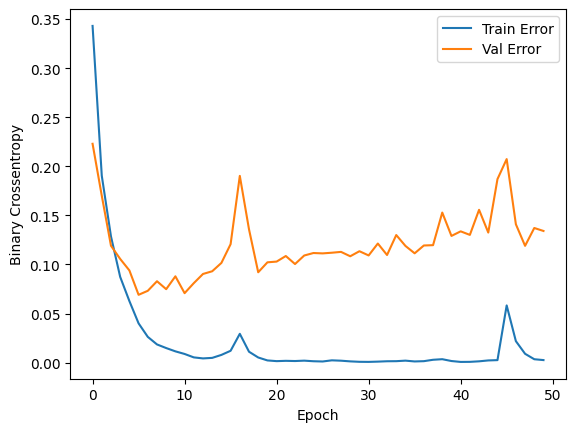

In [58]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')

plt.plot(hist_model_1['epoch'], hist_model_1['loss'], label='Train Error')
plt.plot(hist_model_1['epoch'], hist_model_1['val_loss'], label = 'Val Error')

plt.legend();

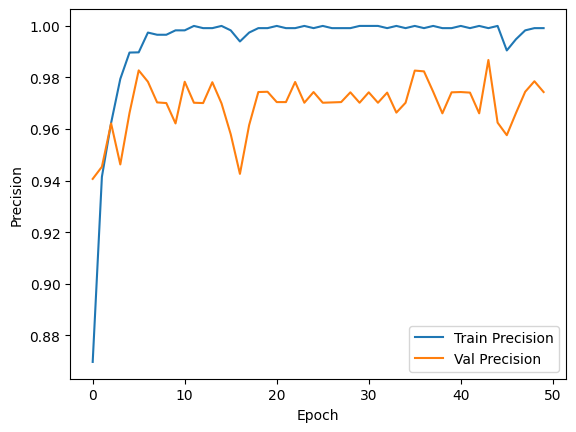

In [59]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Precision')

plt.plot(hist_model_1['epoch'], hist_model_1['precision'], label='Train Precision')
plt.plot(hist_model_1['epoch'], hist_model_1['val_precision'], label = 'Val Precision')

plt.legend();


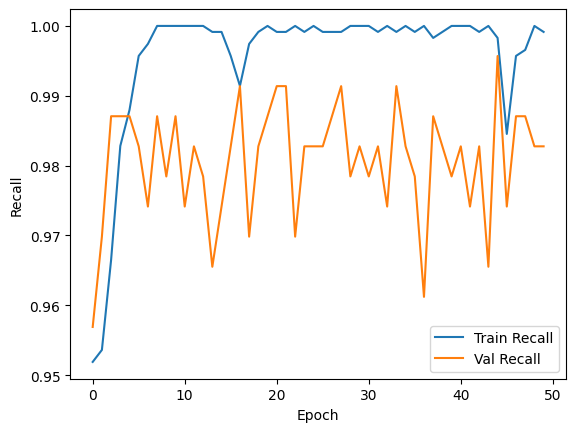

In [60]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Recall')

plt.plot(hist_model_1['epoch'], hist_model_1['recall'], label='Train Recall')
plt.plot(hist_model_1['epoch'], hist_model_1['val_recall'], label = 'Val Recall')

plt.legend();

### 3.E)

Evaluar el modelo con el conjunto de datos de test e interpretar los resultados comparándolos con los de train y validación.

In [61]:
results_model_1 = model_1.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 3ms/step - loss: 0.0226 - precision: 1.0000 - recall: 0.9872


Creemos que nuestro modelo generaliza muy bien porque obtenemos muy buenos reultados tanto con datasets de validación como con test.

Aunque vemos como el modelo esta sobreajustando en los gráficos de comparación de las métricas elegidas, se aprecia con el paso de las epocas un estancamiento o incluso empeoramiento en los datos de validacion mientras el modelo sigue aprendiendo y mejorando en los datos de entrenamiento.

## Ejercicio 4

### 4.A)

Crear un modelo que tenga la misma estructura, parámetros de compilación (optimizer, loss y metrics), parámetros de entrenamiento (set de train/validación, épocas, batch_size...) y repetir el entrenamiento pero esta vez incluyendo Dropout en, al menos, dos capas Densas.

In [62]:
model_2 = keras.Sequential(
    [
     keras.Input(shape=(X_train.shape[1],)),  # capa de entrada, tendrá tantas neuronas como variables usemos para entrenar
     layers.Dense(128, activation='relu'),  # capa oculta
     layers.Dropout(0.5),  # primera capa de dropout
     layers.Dense(64, activation='relu'),  # capa oculta
     layers.Dropout(0.5),  # segunda capa de dropout
     layers.Dense(32, activation='relu'),  # capa oculta
     layers.Dense(1, activation='sigmoid')  # capa de salida
    ]
)

In [63]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])

In [64]:
history_model_2 = model_2.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_data=(X_val, y_val)
)

Epoch 1/50
50/50 [==============================] - 2s 10ms/step - loss: 0.5517 - accuracy: 0.7423 - recall_1: 0.9493 - val_loss: 0.3738 - val_accuracy: 0.8671 - val_recall_1: 0.9828
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.3475 - accuracy: 0.8383 - recall_1: 0.9364 - val_loss: 0.2533 - val_accuracy: 0.8861 - val_recall_1: 0.9526
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.8781 - recall_1: 0.9356 - val_loss: 0.2047 - val_accuracy: 0.9146 - val_recall_1: 0.9397
Epoch 4/50
50/50 [==============================] - 0s 6ms/step - loss: 0.2486 - accuracy: 0.8970 - recall_1: 0.9304 - val_loss: 0.1824 - val_accuracy: 0.9272 - val_recall_1: 0.9526
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.2298 - accuracy: 0.9002 - recall_1: 0.9338 - val_loss: 0.1662 - val_accuracy: 0.9430 - val_recall_1: 0.9569
Epoch 6/50
50/50 [==============================] - 0s 6ms/step - loss: 0.2049 - accuracy

In [65]:
hist_model_2 = pd.DataFrame(history_model_2.history)
hist_model_2['epoch'] = history_model_2.epoch
hist_model_2.head()

,loss,accuracy,recall_1,val_loss,val_accuracy,val_recall_1,epoch
0,0.551740,0.742262,0.949313,0.373786,0.867089,0.982759,0
1,0.347463,0.838282,0.936426,0.253294,0.886076,0.952586,1
2,0.283080,0.878080,0.935567,0.204721,0.914557,0.939655,2
3,0.248573,0.897031,0.930412,0.182384,0.927215,0.952586,3
4,0.229754,0.900190,0.933849,0.166212,0.943038,0.956897,4


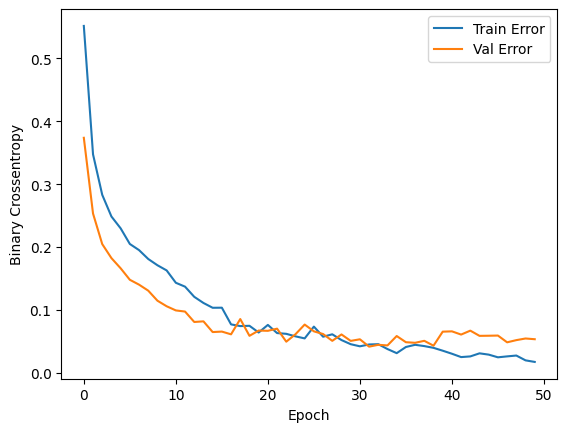

In [66]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')

plt.plot(hist_model_2['epoch'], hist_model_2['loss'], label='Train Error')
plt.plot(hist_model_2['epoch'], hist_model_2['val_loss'], label = 'Val Error')

plt.legend();

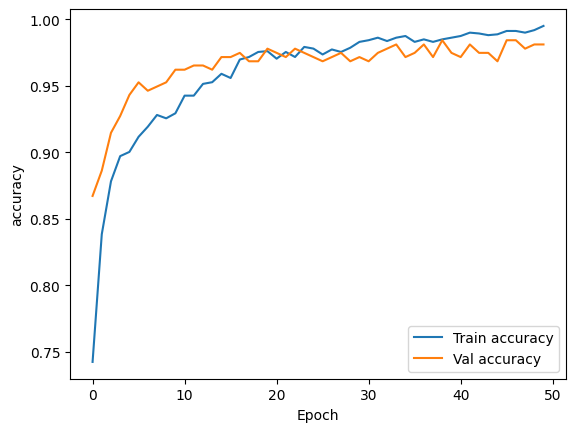

In [67]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.plot(hist_model_2['epoch'], hist_model_2['accuracy'], label='Train accuracy')
plt.plot(hist_model_2['epoch'], hist_model_2['val_accuracy'], label = 'Val accuracy')

plt.legend();


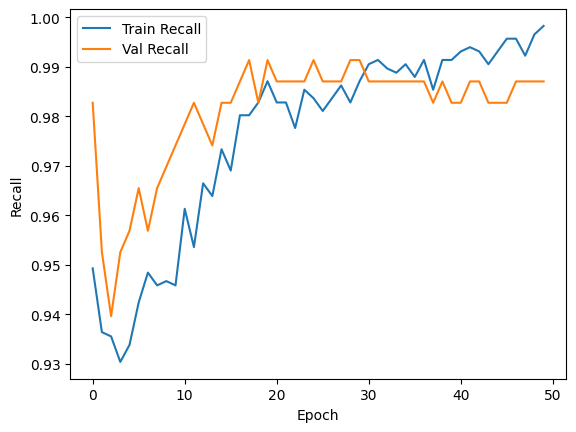

In [69]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Recall')

plt.plot(hist_model_2['epoch'], hist_model_2['recall_1'], label='Train Recall')
plt.plot(hist_model_2['epoch'], hist_model_2['val_recall_1'], label = 'Val Recall')

plt.legend();

In [70]:
results_model_2 = model_2.evaluate(X_test, y_test, verbose=1)

7/7 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 0.9953 - recall_1: 1.0000


### 4.B)

Comparar los nuevos resultados y comentar los resultados.

In [71]:
from sklearn.metrics import confusion_matrix


In [72]:
# obtener las etiquetas predichas para ambos modelos
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

# redondear las etiquetas predichas a 0 o 1
y_pred_1 = np.round(y_pred_1)
y_pred_2 = np.round(y_pred_2)

# crear matrices de confusión para ambos modelos
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(y_test, y_pred_2)

# imprimir las matrices de confusión
print("Matriz de confusión para el modelo model_1:")
print(cm_1)
print("\nMatriz de confusión para el modelo model_2:")
print(cm_2)

7/7 [==============================] - 0s 2ms/step
Matriz de confusión para el modelo model_1:
[[ 56   0]
 [  2 154]]

Matriz de confusión para el modelo model_2:
[[ 55   1]
 [  0 156]]


En una población, hay un modelo que, para cada ciudadano estudiado, determina si tiene riesgo de sufrir obesidad según sus hábitos alimenticios y condición física. Si entendemos como:

1 persona con riesgo de sobrepeso. 

0 persona sana.

Entendemos que sería beneficioso para la sociedad entender que comportamientos o variables pueden conllevar un riesgo para nuestra salud. A nivel de aplicatividad sería interesante desplegar estos modelos en el sistema de la seguridad social para prevenir futuros tratamientos.

- Matriz de confusión para el modelo hist_model_1:


  Esta matriz muestra que el modelo tiene un alto rendimiento en términos de la precisión y recall de la predicción, ya que la mayoría de las predicciones son verdaderos positivos y verdaderos negativos. 

  Problema, vemos signos de que el modelo esta sobreajustando.


- Matriz de confusión para el modelo hist_model_2 ( Drop out ):

  Esta matriz muestra que el modelo tiene un alto rendimiento en términos de la precisión y recall de la predicción, ya que la mayoría de las predicciones son verdaderos positivos y verdaderos negativos. Al introducir drop outs para corregir el sobreajuste del modelo hemos sacrificado un poco de información, aceptando el aumento de la precisión disminuyendo la sensibilidad.Esto implica aumentar el umbral de decisión, lo que resulta en clasificar menos muestras como positivas. Disminuir la sensibilidad puede ser preferible cuando se busca minimizar la tasa de falsos positivos, incluso a costa de perder algunos casos positivos. De igual manera mantenemos un recall extraordinario y podemos asegurar con certeza al usuario que el riesgo está latente si no cambia de hábitos de vida o se trata.
  


Como pruebas futuras para mejorar el modelo:


Un aumento del dataset de estudio.

Una variable objetivo mas balanceada.

Añadir regularizadores como L1 o L2 para controlar el sobreajuste, mejorar la generalización del modelo y controlar la complejidad del mismo.
Intentar ajustar los hiperparametros, epocas, bach, etc.

Trabajo realizado por :

*  Pietro Giacchero
*  Erick Castillo
*  Alejandro Alio
*  Iván Reyes


In [81]:
%%shell
jupyter nbconvert --to html /content/Actividad_Redes_Neuronales.ipynb

[NbConvertApp] Converting notebook /content/Actividad_Redes_Neuronales.ipynb to html
[NbConvertApp] Writing 1024903 bytes to /content/Actividad_Redes_Neuronales.html
